In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./news_orgs.csv")

In [3]:
df.head()

,publication_name,parent_publication,url,owner,is_owner_founder,city,state,country,primary_language,primary_language_other,...,revenue_stream_other,revenue_stream_additional_info,revenue_stream_largest,revenue_streams_largest_other,paywall_or_gateway,paywall_or_gateway_other,advertising_products,advertising_product_other,real_world_impacts,summary
0,1808Delaware,Total|Local Media,https://1808delaware.com,Thomas Palmer,Yes,Mansfield,OH,United States,English,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1812Blockhouse,Total|Local Media,https://1812blockhouse.com,Thomas Palmer,Yes,Mansfield,OH,United States,English,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,You are looking at something new and innovativ...
2,365 Cincinatti,NaN,https://365cincinnati.com,NaN,No,Cincinatti,OH,United States,English,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"This site and the Facebook page (100,000+ stro..."
3,40 South News,NaN,http://40southnews.com/contact,NaN,No,"Brentwood, Maplewood & Richmond Heights",MO,United States,English,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"40 South News covers Brentwood, Maplewood and ..."
4,6AM City Inc,NaN,https://6amcity.com,"Ryan Johnston, Ryan Heafy",Yes,Greenville,SC,United States,English,NaN,...,NaN,NaN,Direct sold advertising,NaN,I don't have a paywall,NaN,Branded content (e.g. marketing content with e...,NaN,6AM City was designed to drive local economic ...,6AM is redefining the future of local media as...


In [4]:
df.columns

Index(['publication_name', 'parent_publication', 'url', 'owner',
       'is_owner_founder', 'city', 'state', 'country', 'primary_language',
       'primary_language_other', 'tax_status_founded', 'tax_status_current',
       'year_founded', 'total_employees', 'budget_percent_editorial',
       'budget_percent_revenue_generation',
       'budget_percent_product_technology', 'budget_percent_administration',
       'products', 'products_other', 'distribution',
       'distribution_method_other', 'geographic_area',
       'core_editorial_strategy_characteristics',
       'core_editorial_strategy_characteristics_other', 'coverage_topics',
       'coverage_topics_other', 'underrepresented_communities',
       'underrepresented_communities_not_listed', 'revenue_streams',
       'revenue_stream_other', 'revenue_stream_additional_info',
       'revenue_stream_largest', 'revenue_streams_largest_other',
       'paywall_or_gateway', 'paywall_or_gateway_other',
       'advertising_products', 'advert

<AxesSubplot:>

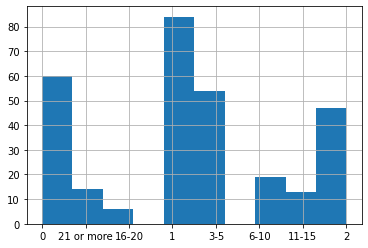

In [5]:
df["total_employees"].hist()

<AxesSubplot:>

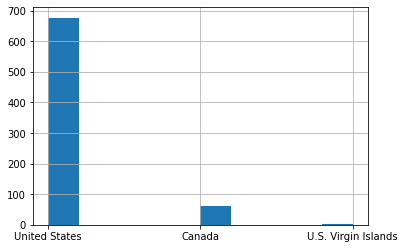

In [6]:
df["country"].hist()

In [7]:
df["geographic_area"].value_counts()

City/Town                                                                                                     75
County/Counties/Regional districts                                                                            45
City/Town, County/Counties/Regional districts                                                                 38
Neighborhood(s), City/Town, County/Counties/Regional districts                                                33
State/Province                                                                                                22
Neighborhood(s), City/Town                                                                                    20
Neighborhood(s)                                                                                               11
Neighborhood(s), City/Town, County/Counties/Regional districts, State/Province                                 8
City/Town, County/Counties/Regional districts, State/Province                                   

In [8]:
def split_lists(df, col):
    # https://towardsdatascience.com/be-a-more-efficient-data-scientist-today-master-pandas-with-this-guide-ea362d27386
    df[col] = df[col].map(lambda x: x.split(", ") if type(x) is str else [])
    
    # https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#exploding-a-list-like-column
    print(df[col].explode().value_counts())
    print(df[col].map(len).hist())

City/Town                             196
County/Counties/Regional districts    144
Neighborhood(s)                        81
State/Province                         56
Multi-state/Multi-province             22
Name: geographic_area, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


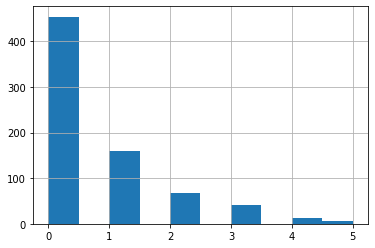

In [9]:
split_lists(df, "geographic_area")

In [10]:
df["revenue_streams"].value_counts()

Direct sold advertising                                                                                                                73
Small individual gifts                                                                                                                 11
Direct sold advertising, Small individual gifts                                                                                         9
Direct sold advertising, Reader membership                                                                                              9
Direct sold advertising, Reader subscriptions                                                                                           8
                                                                                                                                       ..
Classifieds, Direct sold advertising, Major individual gifts, Other forms of corporate sponsorship                                      1
Events, Foundation funding        

Direct sold advertising                          177
Small individual gifts                            76
Reader membership                                 56
Foundation funding                                51
Major individual gifts                            37
Other forms of corporate sponsorship              30
Philanthropic funding from major institutions     29
Programmatic advertising                          28
Events                                            24
Reader subscriptions                              22
Grants                                            12
Classifieds                                        9
but intend to do so                                8
Haven’t generated revenue yet                      8
Other Marketing Services                           7
e-Commerce                                         4
Business underwriting                              3
Web development                                    1
Senior Health coverage underwriter            

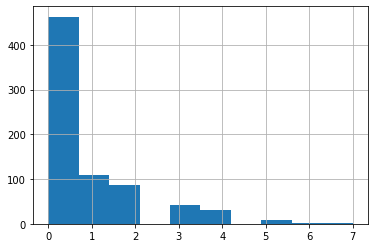

In [11]:
split_lists(df, "revenue_streams")

In [12]:
df["products"].value_counts()

Originally-reported articles                                                                                 31
Newsletters, Originally-reported articles                                                                    19
Originally-reported articles, Newsletters                                                                    16
Newsletters, Originally-reported articles, Video                                                              8
Originally-reported articles, Printed media                                                                   7
                                                                                                             ..
Events, Originally-reported articles, Social media-only content, Video                                        1
Originally-reported articles, Video, Newsletters, Events                                                      1
Branded Merchandise, Events, News aggregation, Newsletters, Originally-reported articles                

Originally-reported articles    276
Newsletters                     199
Video                           137
Events                           99
Social media-only content        84
Podcasts                         76
Digital marketing services       64
Printed media                    54
News aggregation                 18
Branded Merchandise               6
Radio                             4
Name: products, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


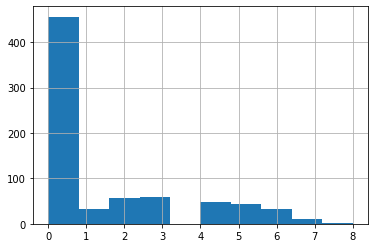

In [13]:
split_lists(df, "products")

In [14]:
df["products_other"].value_counts()

Audio       1
webinars    1
Name: products_other, dtype: int64

In [15]:
df["distribution"].value_counts()

Social media, Website                                                                                                                         41
Website, Social media                                                                                                                         40
Social media, Third party content platforms, Website                                                                                          26
Website, Social media, Third party content platforms                                                                                          22
Website                                                                                                                                       16
                                                                                                                                              ..
Social media, Television, Website                                                                                                 

Website                                    278
Social media                               255
Third party content platforms               91
Email                                       62
Syndicated feed or content partnerships     53
Owned and operated mobile app(s)            27
Print                                       25
Podcast                                     15
Events                                      11
Radio                                       11
Aggregation                                  9
Text                                         5
Television                                   3
Name: distribution, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


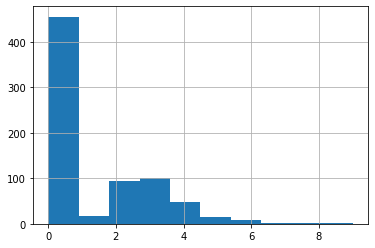

In [16]:
split_lists(df, "distribution")

In [17]:
df["distribution_method_other"].value_counts()

e-Commerce    1
Name: distribution_method_other, dtype: int64

In [18]:
df["core_editorial_strategy_characteristics"].value_counts()

Hyperlocal community comings and goings                                                                                                                                 43
Curation and commentary, Hyperlocal community comings and goings                                                                                                        19
Hyperlocal community comings and goings, In-depth feature and explanatory reporting                                                                                     18
In-depth feature and explanatory reporting, Investigative news                                                                                                          12
Curation and commentary, Hyperlocal community comings and goings, In-depth feature and explanatory reporting                                                            12
Single-subject news                                                                                                                              

Hyperlocal community comings and goings       207
In-depth feature and explanatory reporting    148
Investigative news                            118
Curation and commentary                       102
Single-subject news                            74
Breaking News                                  35
Name: core_editorial_strategy_characteristics, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


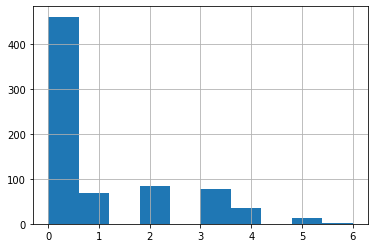

In [19]:
split_lists(df, "core_editorial_strategy_characteristics")

In [20]:
df["underrepresented_communities"].value_counts()

Low-income communities                                                                                                                                   15
Ethnic communities, Immigrant communities, LGBTQI communities, Low-income communities, People of color                                                   12
Communities with English as a second language, Ethnic communities, Immigrant communities, LGBTQI communities, Low-income communities, People of color    11
Low-income communities, People of color                                                                                                                  11
People of color                                                                                                                                           6
LGBTQI communities                                                                                                                                        6
People of color, Low-income communities                         

Low-income communities                           87
People of color                                  82
Ethnic communities                               55
Immigrant communities                            52
LGBTQI communities                               49
Communities with English as a second language    34
Indigenous Populations                            5
Name: underrepresented_communities, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


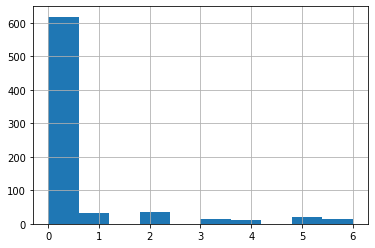

In [21]:
split_lists(df, "underrepresented_communities")

In [22]:
df["revenue_stream_largest"].value_counts()

Direct sold advertising                                             141
Foundation funding                                                   27
Small individual gifts                                               20
Reader membership                                                    15
Philanthropic funding from major institutions                        14
Major individual gifts                                               13
Reader subscriptions                                                 12
Programmatic advertising                                              7
Haven’t generated revenue yet, but intend to do so                    7
Grants                                                                5
Other forms of corporate sponsorship                                  5
Events                                                                4
Other Marketing Services                                              3
Syndicated Content                                              

In [23]:
df["paywall_or_gateway"].value_counts()

I don't have a paywall                                           187
Static meter (e.g., five free articles per month)                  8
Hybrid model (some free content, separate premium tier)            5
Hard paywall (all content behind a gate)                           3
Other                                                              2
Propensity meter (variable number of free articles per month)      1
Name: paywall_or_gateway, dtype: int64

In [24]:
df["advertising_products"].value_counts()

I don’t sell any advertising products.                                                                                                                   42
Display                                                                                                                                                  40
Content Sponsorship, Display                                                                                                                             22
Display, Content Sponsorship                                                                                                                             18
Display, Content Sponsorship, Branded content (e.g. marketing content with editorial review by the advertiser)                                           18
                                                                                                                                                         ..
Branded content (e.g. marketing content with editorial review by

Display                                                                             212
Content Sponsorship                                                                 139
Branded content (e.g. marketing content with editorial review by the advertiser)    104
Video                                                                                47
I don’t sell any advertising products.                                               43
Email                                                                                27
Event sponsorship                                                                    22
Social Media                                                                         21
Classifieds                                                                          15
Print ads                                                                            12
Podcast Sponsorship                                                                  11
e-Commerce                      

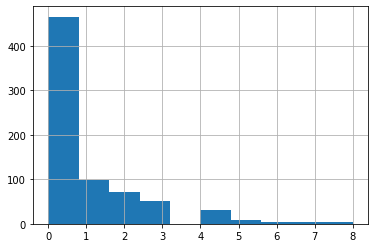

In [25]:
split_lists(df, "advertising_products")

In [26]:
df["real_world_impacts"].value_counts()

We keep our community informed about what is happening - we let them know what their government is up to and keep an eye on elected officials, we share information about local businesses, events, we publish obituaries and we cover schools, including high school sports. We chronicle history and many readers clip articles and photos about friends and loved ones as well as stories that interest them.                                                                                                                                      2
We have created community, education, religious literacy, filled news void                                                                                                                                                                                                                                                                                                                                                                                                      

In [27]:
df["summary"].value_counts()

QuickBite News runs four of the western GTA’s most influential media websites, offering news, food, lifestyle and entertainment coverage for millions to the Golden Horseshoe and GTA regions. The sites reach 50 million people and boast an average monthly reach of 4.2 million viewers per month.\nThe independently-run, online news source was founded in 2012 and specializes in everything from breaking news to food and restaurant, arts and entertainment and lifestyle coverage.    3
TAP into Newton is an all-online, objective, newspaper serving the residents, organizations, and business owners of Newton, New Jersey.                                                                                                                                                                                                                                                                                                                                                         2
Valley News is a weekly community ne

In [28]:
df["tax_status_founded"].value_counts()

LLC                                        116
Sole Proprietor/no specific tax status      71
Nonprofit 501c(3) or Canadian nonprofit     34
Under umbrella of a 501c(3)                 25
For Profit                                  21
S Corp                                      20
Public-benefit corporation                   2
Partnership                                  2
Name: tax_status_founded, dtype: int64

In [29]:
df["tax_status_current"].value_counts()

For Profit                                 348
LLC                                        128
Not for Profit                             116
Nonprofit 501c(3) or Canadian nonprofit     52
Sole Proprietor/no specific tax status      39
S Corp                                      29
Under umbrella of a 501c(3)                 18
Public-benefit corporation                   4
Partnership                                  4
Name: tax_status_current, dtype: int64

In [30]:
df_tax_status_change = df[pd.notna(df["tax_status_founded"])]

In [31]:
pd.notna(df_tax_status_change["tax_status_current"]).value_counts()

True    291
Name: tax_status_current, dtype: int64

In [32]:
df_tax_status_change = df_tax_status_change[["tax_status_founded", "tax_status_current"]]
df_tax_status_change.to_json("tax_status.json", orient="records")

# picking it back up May 3, 2022

In [36]:
df.head()

,publication_name,parent_publication,url,owner,is_owner_founder,city,state,country,primary_language,primary_language_other,...,revenue_stream_other,revenue_stream_additional_info,revenue_stream_largest,revenue_streams_largest_other,paywall_or_gateway,paywall_or_gateway_other,advertising_products,advertising_product_other,real_world_impacts,summary
0,1808Delaware,Total|Local Media,https://1808delaware.com,Thomas Palmer,Yes,Mansfield,OH,United States,English,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN
1,1812Blockhouse,Total|Local Media,https://1812blockhouse.com,Thomas Palmer,Yes,Mansfield,OH,United States,English,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,You are looking at something new and innovativ...
2,365 Cincinatti,NaN,https://365cincinnati.com,NaN,No,Cincinatti,OH,United States,English,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,"This site and the Facebook page (100,000+ stro..."
3,40 South News,NaN,http://40southnews.com/contact,NaN,No,"Brentwood, Maplewood & Richmond Heights",MO,United States,English,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,"40 South News covers Brentwood, Maplewood and ..."
4,6AM City Inc,NaN,https://6amcity.com,"Ryan Johnston, Ryan Heafy",Yes,Greenville,SC,United States,English,NaN,...,NaN,NaN,Direct sold advertising,NaN,I don't have a paywall,NaN,[Branded content (e.g. marketing content with ...,NaN,6AM City was designed to drive local economic ...,6AM is redefining the future of local media as...


In [39]:
final_df = df[df['country'] == 'United States']
final_df = final_df[['publication_name', 'url', 'state', 'tax_status_current', 'year_founded', 'total_employees', 'products', 'revenue_stream_largest', 'distribution', 'underrepresented_communities']]
final_df.to_json("all.json", orient="records")